# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [150]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [151]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [164]:
# Your code here

def alpha_func(D, idx):
   cov_ = np.cov(D[['Sepal.Width','Sepal.Length']].loc[idx], rowvar=False) # https://numpy.org/doc/stable/reference/generated/numpy.cov.html
   return ((cov_[1,1] - cov_[0,1]) /
           (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

Test the code below

In [165]:
alpha_func(df, range(150)) #alpha calculated on the population 

0.7580390244311441

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [166]:
rng = np.random.default_rng(0)
alpha_func(df,                         
           rng.choice(150,    #Used 150 because there are 150 rows
                      150,
                      replace=True))         

0.8116994146413992

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

    The mean standard error, which is an estimate of how much each petal varies away from the mean  

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [171]:
# Add your code here to set the seed
np.random.seed()

bootstrap_values = []
def boot_SE(D, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = D.shape[0]
    for i in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = alpha_func(D, idx)
        bootstrap_values.append(value)
        
    return np.std(np.array(bootstrap_values))

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [172]:
# Your code here

alpha_SE = boot_SE(D=df,
                   B=1000,
                   seed=0)
alpha_SE                       #This is explains as to how much we would expect ᾰ (alfa chapeau) to dipher from α, which is by 0.0318  

0.03180510076860767

<function matplotlib.pyplot.show(close=None, block=None)>

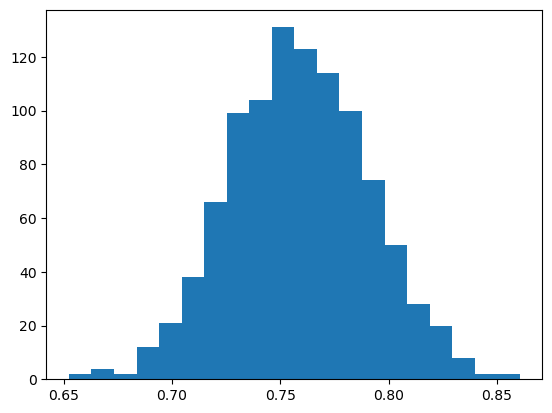

In [174]:
plt.hist(bootstrap_values, bins=15)
plt.show

_(vi)_ What is the original mean value of `Sepal.Length`?

    R = Sepal.Length    5.843333

Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [231]:
print(f"Bootstrap Mean: {np.mean(bootstrap_values)}")
print ("Standard Deviation: " , np.std(np.array(bootstrap_values)))
print ("95% percentile: " , np.percentile(np.array(bootstrap_values), [2.5,97.5]))

Bootstrap Mean: 0.7586908016620232
Standard Deviation:  0.03180510076860767
95% percentile:  [0.69719365 0.82072064]


In [250]:
# Add your code here
# Original data
data = df['Sepal.Length']

# Number of bootstrap samples
B = 1000

# Function to generate bootstrap samples and compute the statistic (mean)
bootstrap_sample_means = []
n = len(data)


for i in range(B):
    bootstrap_sample = np.random.choice(data, size=n, replace=True)         #Extracting a sample from data (Sepal.lenth)
    bootstrap_sample_means.append(np.mean(bootstrap_sample))                #Calculating the mean of the sample



print('Bootstrapped Sample Mean Value:        ', np.mean(bootstrap_sample_means))
print('Std Dev of bootstrapped samples:       ', np.std(bootstrap_sample)) 

print('Population mean:                       ', np.mean(df['Sepal.Length'])) #Population Mean
print('Std Dev of the Population:             ', np.std(df['Sepal.Length'])) #Population Standard Deviation


Bootstrapped Sample Mean Value:         5.843675999999999
Std Dev of bootstrapped samples:        0.8400076719226371
Population mean:                        5.843333333333334
Std Dev of the Population:              0.8253012917851409


In [252]:
t_range = np.ptp(bootstrap_sample_means)
print('Bootstrapped Mean Value for Sepal.Lenth:   ', t_range)

Bootstrapped Mean Value for Sepal.Lenth:    0.39333333333333265


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [194]:
# Add your code here

# Convert to numpy array for easier manipulation
bootstrap_sample_means = np.array(bootstrap_sample_means)

# Compute the 95% confidence interval
conf_interval = np.percentile(bootstrap_sample_means, [2.5, 97.5]) # Compute the 2.5% and 97.5% percentile

print(f"95% Confidence Interval: {conf_interval}")

95% Confidence Interval: [5.71331667 5.98      ]


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

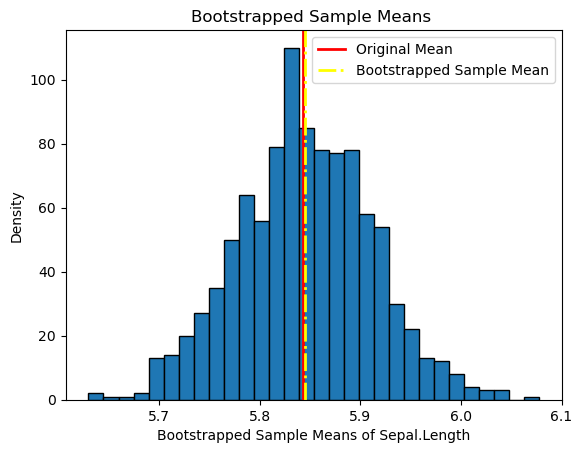

In [209]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(bootstrap_sample_means, bins=30, edgecolor='black')
#Add your code here

# Add a title
ax.set_title('Bootstrapped Sample Means ')
#Add your code here

# Add a label to the x-axis
ax.set_xlabel('Bootstrapped Sample Means of Sepal.Length')
#Add your code here

# Add a label to the y-axis
ax.set_ylabel('Density')
#Add your code here
ax.axvline(np.mean(df['Sepal.Length']), color='red', linestyle='-', linewidth=2, label='Original Mean')
ax.axvline(np.mean(bootstrap_sample_means), color='yellow', linestyle='-.', linewidth=2, label='Bootstrapped Sample Mean')
ax.legend()

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

    Given the results, low variance of our model the company has a good estimate of the Mean size of the Iris petal's (around ~5.84) and how much they can differ from this mean, by the confidence interval we know that 95% of the time it will vary between 5.71 and 5.98. Knowing this the company has good information to calculate the space allotment they'll need for the upcoming shipment.

    

In [ ]:
# Write your answer here


# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
